# 实验报告

# 一元回归预测房价

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("week10_homework.csv")
print(data.head())

   No  square_feet  price
0   1          150   6450
1   2          200   7450
2   3          250   8450


In [3]:
new_data = data.iloc[:,1:]
print(new_data.head())

   square_feet  price
0          150   6450
1          200   7450
2          250   8450


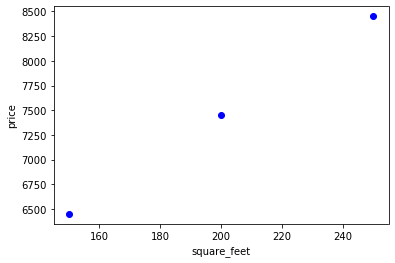

In [4]:
plt.scatter(new_data.square_feet,new_data.price,color = 'b',label = "Exam Data")
plt.xlabel("square_feet")
plt.ylabel("price")
plt.show()

In [5]:
rDf = new_data.corr()
print(rDf)

             square_feet  price
square_feet          1.0    1.0
price                1.0    1.0


In [6]:
exam_X = data.square_feet
exam_Y = data.price
X_train,X_test,Y_train,Y_test = train_test_split(exam_X,exam_Y,train_size=.8)
#X_train为训练数据标签,X_test为测试数据标签,exam_X为样本特征,exam_y为样本标签，train_size 训练数据占比
print("原始数据特征:",exam_X.shape,      ",训练数据特征:",X_train.shape,      ",测试数据特征:",X_test.shape) 
print("原始数据标签:",exam_Y.shape,      ",训练数据标签:",Y_train.shape,      ",测试数据标签:",Y_test.shape) 

原始数据特征: (3,) ,训练数据特征: (2,) ,测试数据特征: (1,)
原始数据标签: (3,) ,训练数据标签: (2,) ,测试数据标签: (1,)


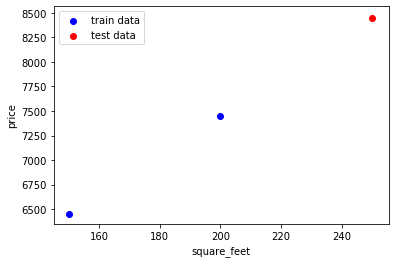

In [7]:
plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data") 
plt.legend(loc=2)
plt.xlabel("square_feet")
plt.ylabel("price")
plt.show()

In [8]:
model = LinearRegression()
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model.fit(X_train,Y_train)
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 3450.0 ,回归系数： [20.]


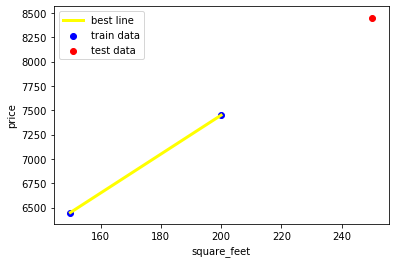

nan


c:\programs\python-3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
y_train_pred = model.predict(X_train)
plt.plot(X_train, y_train_pred, color='yellow', linewidth=3, label="best line") 
plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data") 
plt.legend(loc=2)
plt.xlabel("square_feet")
plt.ylabel("price")
plt.show()  
score = model.score(X_test,Y_test) 
print(score)

In [10]:
model.predict([[500]])
print(model.predict([[1000]]))
alpha=model.intercept_
beta=model.coef_
new_r=alpha+beta*np.array([1000])
new_r

[23450.]


array([23450.])

In [24]:
model.fit(data.square_feet.values.reshape(-1,1),data.price)
print(model.predict([[1000]]))

[30548.40425532]


# 多元回归预测房价

数据来源 https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [137]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [138]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D85A81E748>,
      dtype=object)

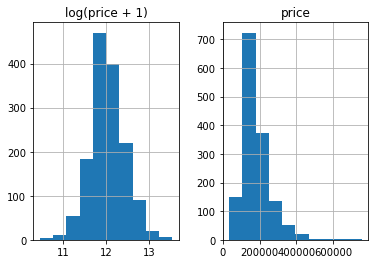

In [140]:
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [141]:
#将训练目标单独拿出
#y_train则是SalePrice那一列
y_train = np.log1p(train_df.pop('SalePrice'))
#把剩下的部分合并起来
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape

(2919, 79)

In [142]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [143]:
all_df['MSSubClass'].dtypes
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
#变成str以后，做个统计
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [144]:
#MSSubClass被分成了12个column，每一个代表一个类。是就是1，不是就是0。
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [145]:
#同理，我们把所有的类数据，都给One-Hot了
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [146]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [70]:
#计算平均值
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [71]:
#用平均值填补缺失值
all_dummy_df = all_dummy_df.fillna(mean_cols)
#查看填补后是否还有缺失值
all_dummy_df.isnull().sum()#.sum()

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 303, dtype: int64

In [73]:
#查看哪些数据是数值型的
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [136]:
all_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.523960,0.407908,0.139507,0.828630,0.359151,0.180484,0.238873
std,0.119964,0.099141,0.041883,0.490842,0.222106,0.109632,0.139466
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441375,0.186000,0.093000,0.130000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.170500,0.232750
75%,0.615000,0.480000,0.165000,1.151500,0.500625,0.252500,0.328625
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


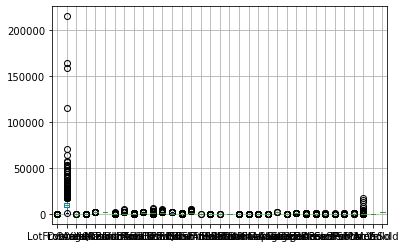

In [77]:
all_df.boxplot()
plt.show()

In [78]:
all_df.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
LotFrontage,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,...,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917
LotArea,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,...,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,...,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,...,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,...,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,...,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,...,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510
BsmtFinSF1,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,...,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556
BsmtFinSF2,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,...,0.003139,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883
BsmtUnfSF,0.113714,0.021362,0.275175,-0.138202,0.130473,0.165175,0.090163,-0.477404,-0.238241,1.000000,...,0.164409,-0.039302,0.119764,0.005006,-0.005810,-0.049158,-0.032273,-0.010492,0.022607,-0.038015


In [80]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [81]:
#查看训练集和测试集的维度
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [82]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [83]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 10.533181308282625 ,回归系数： [ 4.04434777e-04  2.86999759e-06  3.85329873e-02  3.47999431e-02
  1.81731921e-03  8.66540182e-04  1.86263120e-05  5.32326101e-05
  4.05192507e-05 -5.91013467e-06  8.78425494e-05  6.57448900e-05
  6.09507019e-05  3.47359431e-05  1.61431221e-04  2.36728833e-02
  4.88053805e-03  2.40856543e-02  2.66632947e-02  4.94761294e-03
 -4.67590445e-02  2.37528998e-03  1.39624044e-02 -2.55032492e-04
  1.73924464e-02  1.28665183e-04  9.45027957e-05  4.08270445e-05
  1.18549943e-04  1.48173324e-04  2.74087299e-04  1.54113511e-03
 -1.90619264e-05 -6.36037834e-04 -2.66067521e-03  2.73959835e-03
  9.12048215e-14 -1.03751758e-01 -1.38723348e-02  9.07831409e-02
  5.33430908e-02 -3.11561703e-03 -3.40514370e-02 -1.82816496e-01
  5.72771293e-02  1.58265790e-02  6.51333665e-02 -7.57740120e-03
 -9.23025785e-03  4.82376395e-02  2.10747570e-02 -3.54966609e-01
  1.28330352e-01  8.48263405e-02  9.21266970e-02  4.96832196e-02
 -4.80596813e-02  4.80596813e-02  1.01406499e-02  3.711

In [86]:
Y_pred = model.predict(X_test)
print(Y_pred)

[11.69979821 12.05312225 12.11669353 ... 12.07776594 11.65109942
 12.2924663 ]


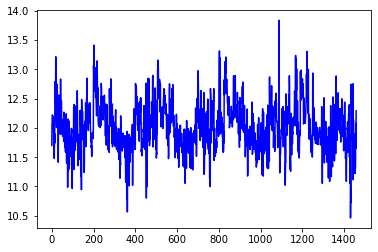

In [87]:
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.show()

# 过拟合与欠拟合

**欠拟合**常常在模型学习能力较弱，而数据复杂度较高的情况出现，此时模型由于学习能力不足，无法学习到数据集中的“一般规律”，因而导致泛化能力弱。

- 增加新特征，可以考虑加入进特征组合、高次特征，来增大假设空间
- 添加多项式特征，这个在机器学习算法里面用的很普遍，例如将线性模型通过添加二次项或者三次项使模型泛化能力更强
- 减少正则化参数，正则化的目的是用来防止过拟合的，但是模型出现了欠拟合，则需要减少正则化参数
- 使用非线性模型，比如核SVM 、决策树、深度学习等模型
- 调整模型的容量(capacity)，通俗地，模型的容量是指其拟合各种函数的能力
- 容量低的模型可能很难拟合训练集；使用集成学习方法，如Bagging ,将多个弱学习器Bagging

**过拟合**常常在模型学习能力过强的情况中出现，此时的模型学习能力太强，以至于将训练集单个样本自身的特点都能捕捉到，并将其认为是“一般规律”，同样这种情况也会导致模型泛化能力下降。

- 数据层面：
    - 数据扩增，即增加训练数据样本，这是解决过拟合最有效的方法，只要给足够多的数据，让模型「看见」尽可能多的「例外情况」，它就会不断修正自己，从而得到更好的结果。
        - 从数据源头获取更多数据
        - 根据当前数据集估计数据分布参数，使用该分布产生更多数据：这个一般不用，因为估计分布参数的过程也会代入抽样误差
        - 数据增强（Data Augmentation）：通过一定规则扩充数据。如在物体分类问题里，物体在图像中的位置、姿态、尺度，整体图片明暗度等都不会影响分类结果。我们就可以通过图像平移、翻转、缩放、切割等手段将数据库成倍扩充

    - 特征工程，筛选组合得到更高质量的特征。

- 模型层面：
    - 正则化（Regularization）（L1和L2）以及树模型的剪枝策略，XGBoost中的正则项惩罚
    
    模型训练的过程中，需要降低 loss 以达到提高 accuracy 的目的。此时，使用正则化之类的方法直接将权值的大小加入到 loss 里，在训练的时候限制权值变大。训练过程需要降低整体的 loss，这时候，一方面能降低实际输出与样本之间的误差，也能降低权值大小正则化方法包括 L0 正则、 L1正则和 L2 正则，而正则一般是在目标函数之后加上范数。L2 范数是指向量各元素的平方和然后求平方根。可以使得 W 的每个元素都很小，都接近于0，但不会让它等于0，而是接近于0。 L2正则项起到使得参数 W 变小加剧的效果，关于它为什么能防止过拟合简答的理解为：更小的参数值 W意味着模型的复杂度更低，对训练数据的拟合刚刚好，不会过分拟合训练数据，从而使得不会过拟合，以提高模型的泛化能力。

    - 选择较为简单的模型

    - 集成学习，Bagging策略组合模型降低模型方差。

- 更多方法：
    - Dropout：在训练时，每次随机（如50%概率）忽略隐层的某些节点；这样，我们相当于随机从 2n(n个神经元的网络) 个模型中采样选择模型

    - Early stopping
    
    Early stopping便是一种迭代次数截断的方法来防止过拟合的方法，即在模型对训练数据集迭代收敛之前停止迭代来防止过拟合。具体做法是，在每一个Epoch结束时计算validation data的accuracy，当accuracy不再提高时，就停止训练。当然我们并不会在accuracy一降低的时候就停止训练，因为可能经过这个Epoch后，accuracy降低了，但是随后的Epoch又让accuracy又上去了，所以不能根据一两次的连续降低就判断不再提高。一般的做法是，在训练的过程中，记录到目前为止最好的validation accuracy，当连续10次Epoch（或者更多次）没达到最佳accuracy时，则可以认为accuracy不再提高了。此时便可以停止迭代了（Early Stopping）。这种策略也称为“No-improvement-in-n”，n即Epoch的次数，可以根据实际情况取，如10、20、30……

# 鲍鱼年龄预测

数据集字段说明 https://blog.csdn.net/qq_41398808/article/details/97814358?ops_request_misc=&request_id=&biz_id=102&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0

## 简单线性回归

In [197]:
import plotly
import plotly.graph_objs as go

In [175]:
train_df = pd.read_csv('train_by.csv', index_col=0)
test_df = pd.read_csv('test_by.csv', index_col=0)

In [198]:
fig1 = go.Scatter3d(x=train_df['Length'],
                    y=train_df['Height'],
                    z=train_df['Whole weight'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="curb-weight"),
                                yaxis=dict( title="horsepower"),
                                zaxis=dict(title="price")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))


'3DPlot.html'

In [177]:
train_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Id,,,,,,,,,
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [178]:
test_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Id,,,,,,,,
3343,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
3344,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320
3345,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.185
3346,M,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115
3347,F,0.615,0.480,0.165,1.1615,0.5130,0.3010,0.305


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D85AFFD488>,
      dtype=object)

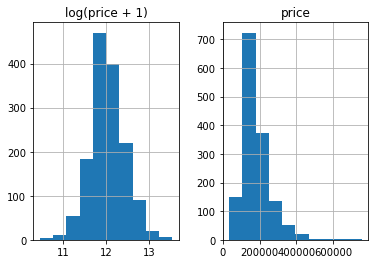

In [179]:
age = pd.DataFrame({"age":train_df["Rings"], "log(price + 1)":np.log1p(train_df["Rings"])})
prices.hist()

In [180]:
#将训练目标单独拿出
#y_train则是SalePrice那一列
y_train = np.log1p(train_df.pop("Rings"))
#把剩下的部分合并起来
all_df = pd.concat((train_df, test_df), axis=0)
all_df.shape

(4080, 8)

In [181]:
y_train.head()

Id
1    2.772589
2    2.079442
3    2.302585
4    2.397895
5    2.197225
Name: Rings, dtype: float64

In [182]:
all_df['Sex'].dtypes
all_df['Sex'].value_counts()

M    1489
I    1312
F    1279
Name: Sex, dtype: int64

In [183]:
#Sex被分成了3个column，每一个代表一个类。是就是1，不是就是0。
pd.get_dummies(all_df['Sex'], prefix='Sex').head()

,Sex_F,Sex_I,Sex_M
Id,,,
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [184]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
Id,,,,,,,,,,
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
4,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0


In [185]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

Sex_M             0
Sex_I             0
Sex_F             0
Shell weight      0
Viscera weight    0
Shucked weight    0
Whole weight      0
Height            0
Diameter          0
Length            0
dtype: int64

In [186]:
all_dummy_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.523960,0.407908,0.139507,0.828630,0.359151,0.180484,0.238873,0.313480,0.321569,0.364951
std,0.119964,0.099141,0.041883,0.490842,0.222106,0.109632,0.139466,0.463965,0.467136,0.481475
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441375,0.186000,0.093000,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.170500,0.232750,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.151500,0.500625,0.252500,0.328625,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


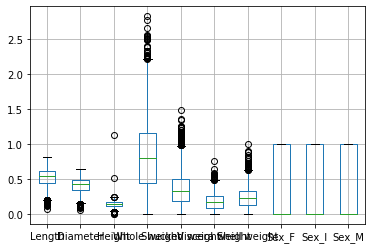

In [187]:
all_dummy_df.boxplot()
plt.show()

In [188]:
all_dummy_df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986855,0.825468,0.925238,0.897843,0.902976,0.897608,0.308635,-0.548306,0.234565
Diameter,0.986855,1.000000,0.831605,0.925369,0.892987,0.899645,0.905159,0.317442,-0.561120,0.238511
Height,0.825468,0.831605,1.000000,0.817590,0.773393,0.796726,0.815703,0.296353,-0.514545,0.213646
Whole weight,0.925238,0.925369,0.817590,1.000000,0.969184,0.966272,0.955315,0.298049,-0.554913,0.251177
Shucked weight,0.897843,0.892987,0.773393,0.969184,1.000000,0.931733,0.882334,0.262368,-0.518838,0.250560
Viscera weight,0.902976,0.899645,0.796726,0.966272,0.931733,1.000000,0.907588,0.306798,-0.552910,0.240803
Shell weight,0.897608,0.905159,0.815703,0.955315,0.882334,0.907588,1.000000,0.304902,-0.544710,0.234674
Sex_F,0.308635,0.317442,0.296353,0.298049,0.262368,0.306798,0.304902,1.000000,-0.465225,-0.512262
Sex_I,-0.548306,-0.561120,-0.514545,-0.554913,-0.518838,-0.552910,-0.544710,-0.465225,1.000000,-0.521912
Sex_M,0.234565,0.238511,0.213646,0.251177,0.250560,0.240803,0.234674,-0.512262,-0.521912,1.000000


In [189]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [190]:
#查看训练集和测试集的维度
dummy_train_df.shape, dummy_test_df.shape

((3342, 10), (738, 10))

In [191]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [192]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 1.547451086257398 ,回归系数： [ 0.52954318  1.13410218  0.97884124  0.55738588 -1.50444214 -0.71460995
  0.56057222  0.02336818 -0.0611696   0.03780142]


In [194]:
Y_pred = model.predict(X_test)
print(Y_pred)

[2.01075501 2.60481079 2.37941765 2.25107046 2.43386799 2.34872597
 2.74482934 2.16016935 1.81310137 2.4045796  2.1997745  2.37429865
 2.41269579 1.97114223 2.45048661 2.53487899 2.58016544 2.6353832
 2.74960822 2.30110764 2.52243484 2.35276749 2.39912003 2.20688991
 2.05188661 2.92464932 1.9122695  2.20739528 2.37764387 1.8137797
 2.54820075 2.85502205 3.14152853 2.87265023 1.82580208 2.58085358
 2.62158015 2.50823964 2.16390752 2.57240413 2.26509876 2.06488106
 2.46802232 2.25067103 2.23370052 2.49805535 2.22852533 1.74136901
 2.03666035 2.07878545 2.58049823 2.45693827 2.03297915 2.33584219
 2.8278795  2.47904407 2.56528821 2.48744852 2.74140152 2.19602494
 2.34712867 2.42244464 2.76003805 2.05520568 2.15106397 2.09697584
 3.14072801 2.5005177  2.43776457 2.40736802 2.60310012 2.57746273
 2.52932497 2.76667839 2.75137199 2.65773186 2.37921238 2.19725246
 2.07246343 2.47832908 2.18481768 2.40273538 2.55742526 2.50614567
 1.91744215 2.6619697  2.23148762 2.53286628 2.23494068 2.473193

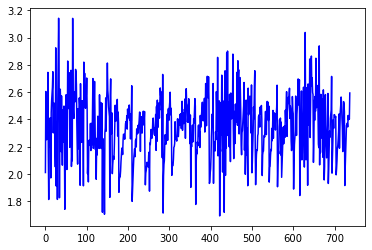

In [195]:
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.show()

## 

In [199]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,y_train,train_size=.8)
#X_train为训练数据标签,X_test为测试数据标签,exam_X为样本特征,exam_y为样本标签，train_size 训练数据占比
print("原始数据特征:",exam_X.shape,      ",训练数据特征:",X_train.shape,      ",测试数据特征:",X_test.shape) 
print("原始数据标签:",exam_Y.shape,      ",训练数据标签:",Y_train.shape,      ",测试数据标签:",Y_test.shape) 

原始数据特征: (7,) ,训练数据特征: (2673, 10) ,测试数据特征: (669, 10)
原始数据标签: (7,) ,训练数据标签: (2673,) ,测试数据标签: (669,)


In [200]:
model.fit(X_train,Y_train)
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 2790914697952.359 ,回归系数： [ 5.29271922e-01  1.19933657e+00  9.14336953e-01  5.75888842e-01
 -1.50439755e+00 -7.49685487e-01  4.83518813e-01 -2.79091470e+12
 -2.79091470e+12 -2.79091470e+12]


In [201]:
score = model.score(X_test,Y_test)
print(score)

0.6041154666111243


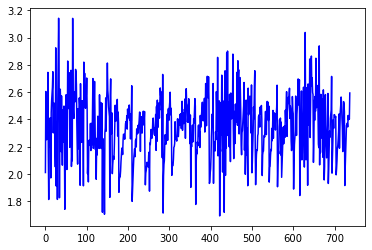

In [202]:
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.show()

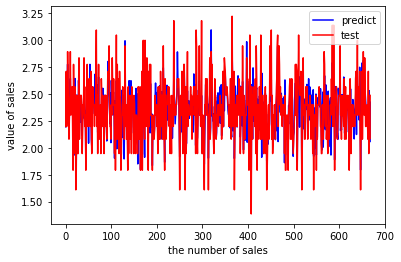

In [204]:
Y_pred = model.predict(X_test)
# X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:3],new_adv_data.sales,train_size=.80)

plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(X_test)),Y_test,'r',label="test")
plt.legend(loc="upper right")
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
data=[["a",2,301],["b",1,201],["c",2,201],["d",1,301],["e",2,301]]
df=pd.DataFrame(data,columns=["A","B","C"])
df.sort_values(by=["C","B"],ascending=[False,True],inplace=True)

In [2]:
df

,A,B,C
3,d,1,301
0,a,2,301
4,e,2,301
1,b,1,201
2,c,2,201
